In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
inpDf_income = pd.read_csv('Development of average annual wages.csv')
print(inpDf_income['Country'])
inpDf_income.head()

0            Iceland *
1         Luxembourg *
2      United States *
3        Switzerland *
4            Belgium *
5            Denmark *
6            Austria *
7        Netherlands *
8          Australia *
9             Canada *
10           Germany *
11    United Kingdom *
12            Norway *
13            France *
14           Ireland *
15           Finland *
16       New Zealand *
17            Sweden *
18       South Korea *
19          Slovenia *
20             Italy *
21            Israel *
22         Lithuania *
23             Spain *
24             Japan *
25            Poland *
26           Estonia *
27            Latvia *
28    Czech Republic *
29            Turkey *
30             Chile *
31        Costa Rica *
32          Portugal *
33           Hungary *
34          Slovakia *
35            Greece *
36          Colombia *
37            Mexico *
Name: Country, dtype: object


,Country,2000,2010,2020,2022
0,Iceland *,"57,008","54,268","71,687","79,473"
1,Luxembourg *,"64,217","71,085","74,839","78,310"
2,United States *,"61,132","67,263","77,567","77,463"
3,Switzerland *,"60,768","67,961","69,728","72,993"
4,Belgium *,"60,929","63,295","63,677","64,848"


In [27]:
inpDf_inflation = pd.read_csv('inflation.csv')
# inpDf_inflation['Average annual inflation rate']
inpDf_inflation.head()

,Unnamed: 0,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,1913.0,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0
1,1,1914.0,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1
2,2,1915.0,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3
3,3,1916.0,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6
4,4,1917.0,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7


In [28]:
inpDf_inflation['Average d inflation rate'] = inpDf_inflation[
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean(axis=1)
inpDf_inflation = inpDf_inflation[['Year', 'Average annual inflation rate']]
inpDf_inflation.head()

,Year,Average annual inflation rate
0,1913.0,9.883333
1,1914.0,10.016667
2,1915.0,10.108333
3,1916.0,10.883333
4,1917.0,12.825000


In [55]:
inflationDf = inpDf_inflation.loc[inpDf_inflation['Year'].isin([2000, 2010, 2020, 2022])]
inflationDf

,Year,Average annual inflation rate
87,2000.0,172.200000
97,2010.0,218.055500
107,2020.0,258.811167
109,2022.0,285.369250


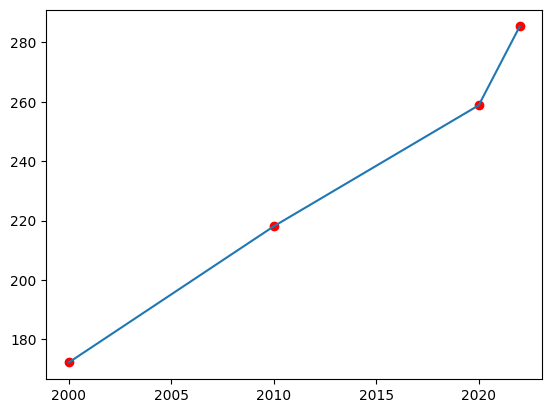

In [56]:
plt.scatter(inflationDf['Year'], inflationDf['Average annual inflation rate'], color='red')
plt.plot(inflationDf['Year'], inflationDf['Average annual inflation rate'])

0    61132.0
1    67263.0
2    77567.0
3    77463.0
Name: 2, dtype: float64


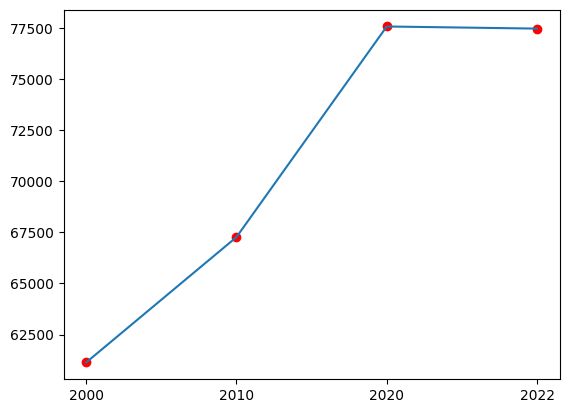

In [69]:
incomeDf = inpDf_income.loc[inpDf_income['Country'] == 'United States *'].copy()
incomeDf.drop(columns=['Country'], inplace=True)
incomeDf = incomeDf.transpose().reset_index()
incomeDf[2] = incomeDf[2].str.replace(',', '').astype(float)
print(incomeDf[2])
plt.scatter(incomeDf['index'], incomeDf[2], color='red')
plt.plot(incomeDf['index'], incomeDf[2])

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_inflation = scaler.fit_transform(inflationDf[['Average annual inflation rate']])
normalized_income = scaler.fit_transform(incomeDf.iloc[:, 1:]) 
normalized_income

array([[0.        ],
       [0.37304533],
       [1.        ],
       [0.99367204]])

In [72]:
normalized_inflation

array([[0.        ],
       [0.40519399],
       [0.76532421],
       [1.        ]])

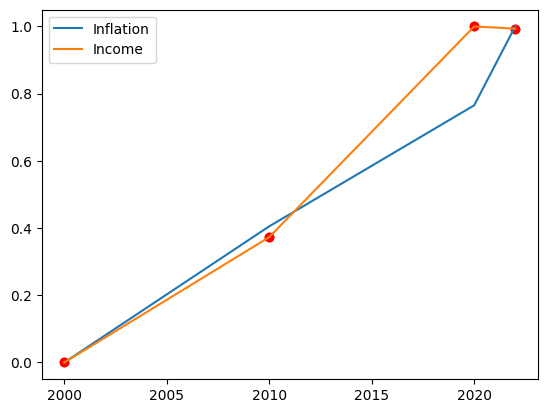

In [75]:
plt.plot(inflationDf['Year'], normalized_inflation, label='Inflation')
plt.scatter(inflationDf['Year'], normalized_income, color='red')
plt.plot(inflationDf['Year'], normalized_income, label='Income')
plt.scatter(inflationDf['Year'], normalized_income, color='red')
plt.legend()